In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [13]:
#creating the sample dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#normalize the data with mean=50 std=10
outliers=np.array([10,110,5,120])#outliers
data=np.concatenate([data,outliers])#adding outliers to the dataset

In [15]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [17]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


# Step 2:Detecting outliers
Using Scatter Plot :


**<ins>A Scatter plot helps visually identify extreme values.</ins>**

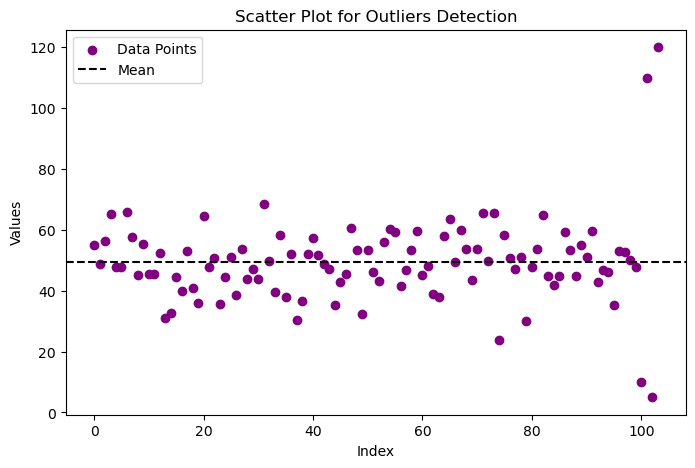

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='purple',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='black',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outliers Detection")
plt.legend()
plt.show()

**Box plot**


**<ins>A box plot is useful for spooting extreme values using quartiles</ins>**

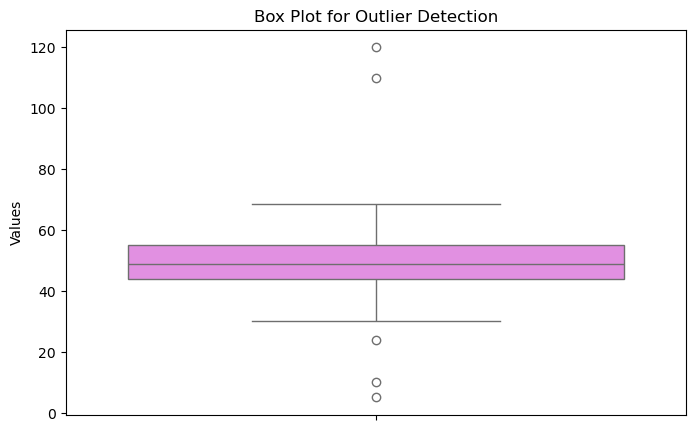

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color='violet')
plt.title("Box Plot for Outlier Detection")
plt.show()

**<ins>Z-Score Method</ins>**

The Z-score formula is:

z = X-M/S

Where:

X = Data Point

M = Mean of the dataset

S = Standard deviation of the dataset

Steps:

1.Compute the z-score for each data point

2.If Z-score>3 or Z-score <-3,mark it as an outlier

In [19]:
# compute z-score for each data point
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**<ins> Interquartile Range(IQR) Method<ins>** The IQR Formula is:

IQR = Q3 - Q1

Steps:

1. Calculate Q1(25th Percentile) and Q3(75th percentile).

2. Compute IQR = Q3-Q1

3. Define lower and upper bounds:


              Lower Bound=Q1-1.5*IQR

              
              Upper Bound=Q3+1.5*IQR

4.Any value outside these bounds is an outlier

In [22]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
# DEFINING BOUNDS
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR


In [30]:
# IDENTIFYING OUTLIERS
df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bounds or x > upper_bounds) else 'Normal')
print(df[df['Outlier_IQR'] == 'Outlier']) #Displaying detected outliers

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**<ins> Final Summary </ins>**

1.Scatter Plot -> Outliers appear far from the main cluser


2.Box Plot  ->  Outliers are outside the whiskers. 

3.z-Score Values with 2 1 or 2-3 are outliers. 

4.IQR Method -> Values outside [Q1-1.5-IQR , Q3+1.5*IQR] are outliers 



**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 
**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**
 

In [55]:
import numpy as np

# Step 1: Create a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#normalize the data with mean=50 std=10
outliers=np.array([10,110,5,120])# Extreme values(outliers)
data=np.concatenate([data,outliers])#Merge normal data with outliers

# Step 2: Compute the 5-number summary
Q1 = np.percentile(data,25) #first Quartile (25th percentile)
Q2 = np.median(data)        #Median (50th percentile)
Q3 = np.percentile(data,75) #Third Quartile(75th Percentile)
min_value = np.min(data)    #Minimum
max_value = np.max(data)    #Maximum

# Step 3 : Compute IQR
IQR = Q3 - Q1

#Step 4 : Compute Outlier Boundaries
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

#Step 5 : Find Outliers
outliers = data[(data < lower_bounds) | (data > upper_bounds)]

#Step 6 : Print Results
print(f"5-Number Summary:\n Min: {min_value},Q1: {Q1},Median (Q2): {Q2},Q3: {Q3},MAX:{max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bounds} , Upper Bound: {upper_bounds}")
print(f"Outliers:{outliers}")

5-Number Summary:
 Min: 5.0,Q1: 43.874401021766715,Median (Q2): 48.73043708220287,Q3: 55.00852473036764,MAX:120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533 , Upper Bound: 71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
